In [3]:
# Adjust the code to properly access the list name from the card data
# and ensure we only process the cards that have the necessary fields.

# Initialize the counters for each label
labels = {
    'PHRU': 0,
    'Wits RHI': 0,
    'CHRU': 0,
    'VIDA': 0,
    'Right to Care': 0,
    'Ezintsha': 0,
    'WCR Bara Clinical Trials unit': 0,
    'HE2RO': 0,
    'DPHRU': 0
}

# Dictionary to track stages for each label
stages = {label: {} for label in labels}

# Iterate over the cards to count and categorize by labels and stages
for card in data['cards']:
    if not card.get('closed', False):  # Skip archived cards
        card_labels = [label for label in card['labels'] if label['name'] in labels]
        for label in card_labels:
            label_name = label['name']
            labels[label_name] += 1
            if 'list' in card and 'name' in card['list']:
                stage = card['list']['name']
                if stage not in stages[label_name]:
                    stages[label_name][stage] = 0
                stages[label_name][stage] += 1

labels, stages


({'PHRU': 11,
  'Wits RHI': 11,
  'CHRU': 1,
  'VIDA': 6,
  'Right to Care': 1,
  'Ezintsha': 5,
  'WCR Bara Clinical Trials unit': 2,
  'HE2RO': 1,
  'DPHRU': 2},
 {'PHRU': {},
  'Wits RHI': {},
  'CHRU': {},
  'VIDA': {},
  'Right to Care': {},
  'Ezintsha': {},
  'WCR Bara Clinical Trials unit': {},
  'HE2RO': {},
  'DPHRU': {}})

In [4]:
# Adjust the function to handle cases where 'listAfter' might not be available
# Initialize the counters for each label
labels = {
    'PHRU': 0,
    'Wits RHI': 0,
    'CHRU': 0,
    'VIDA': 0,
    'Right to Care': 0,
    'Ezintsha': 0,
    'WCR Bara Clinical Trials unit': 0,
    'HE2RO': 0,
    'DPHRU': 0
}

# Dictionary to track stages for each label
stages = {label: {} for label in labels}

# Helper function to get the list name of a card
def get_list_name(card_id):
    for action in data['actions']:
        if action['type'] == 'updateCard' and action['data']['card']['id'] == card_id:
            if 'listAfter' in action['data']:
                return action['data']['listAfter']['name']
            if 'listBefore' in action['data']:
                return action['data']['listBefore']['name']
    return None

# Iterate over the cards to count and categorize by labels and stages
for card in data['cards']:
    if not card.get('closed', False):  # Skip archived cards
        card_labels = [label for label in card['labels'] if label['name'] in labels]
        list_name = get_list_name(card['id'])
        if list_name:
            for label in card_labels:
                label_name = label['name']
                labels[label_name] += 1
                if list_name not in stages[label_name]:
                    stages[label_name][list_name] = 0
                stages[label_name][list_name] += 1

labels, stages


({'PHRU': 3,
  'Wits RHI': 3,
  'CHRU': 0,
  'VIDA': 4,
  'Right to Care': 0,
  'Ezintsha': 4,
  'WCR Bara Clinical Trials unit': 1,
  'HE2RO': 0,
  'DPHRU': 1},
 {'PHRU': {'Expressed interest in participating/Next steps email or address queries on application': 1,
   'Batch to send to Ethics for notifications': 1,
   'Harmonization coding check': 1},
  'Wits RHI': {'Batch to send to Ethics for notifications': 1,
   'Transfer of data in progress (UCT)': 1,
   'Harmonization mapping in progress': 1},
  'CHRU': {},
  'VIDA': {'1st Follow up needs to be actioned': 1,
   'Transfer of data in progress (UCT)': 1,
   'Data transfered to UCT': 1,
   'Harmonization mapping in progress (Wits/UPGC)': 1},
  'Right to Care': {},
  'Ezintsha': {'Entering into DTA/follow up with Wits Legal': 1,
   'Harmonization health check (Wits)': 2,
   'Database Integration (UCT)': 1},
  'WCR Bara Clinical Trials unit': {'Expressed interest in participating/Next steps email or address queries on application': 1},

C:\Users\CraigParker\AppData\Local\Temp\ipykernel_1804\930071807.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(labels_count.keys(), rotation=45, ha='right')


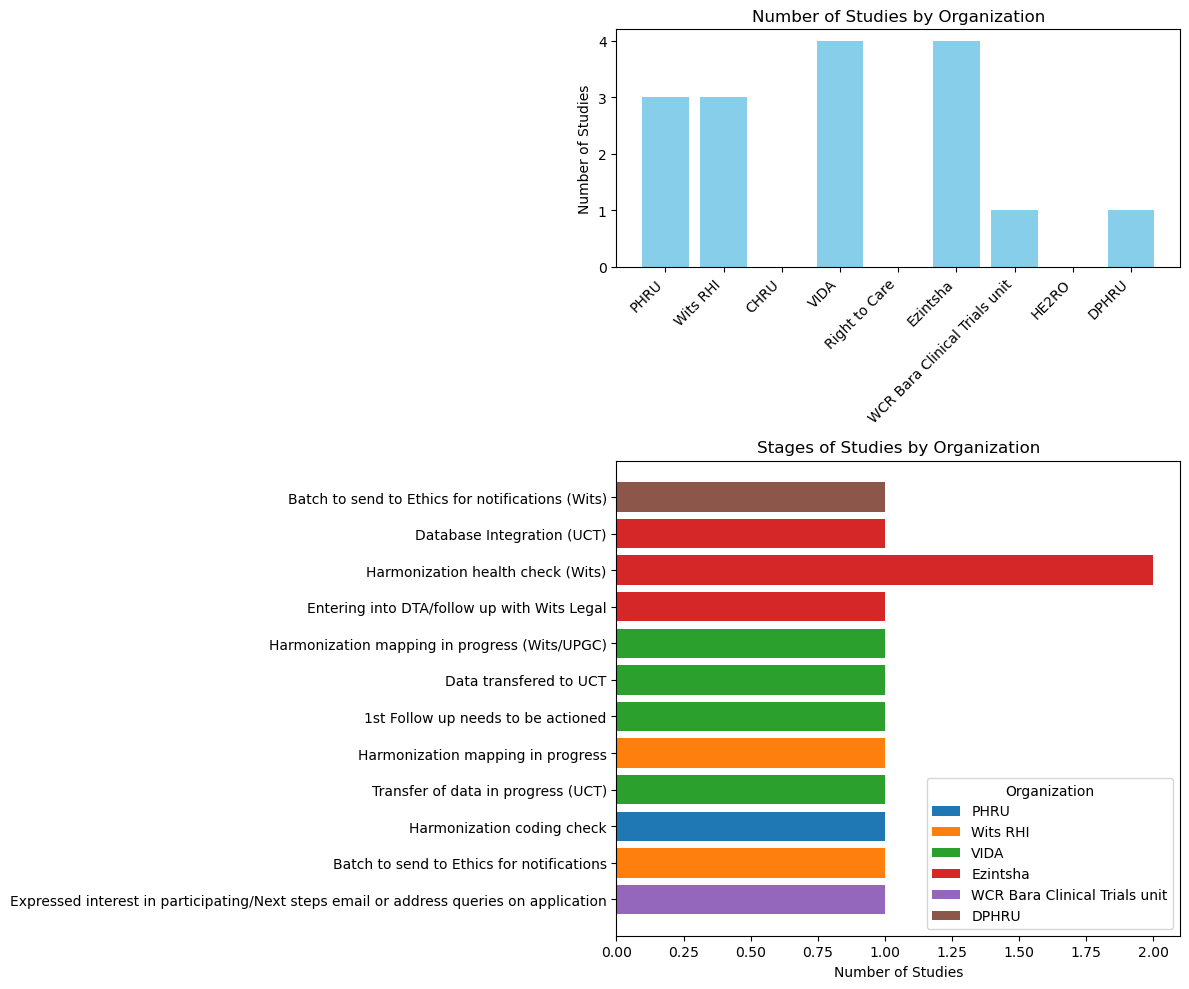

In [5]:
import matplotlib.pyplot as plt

# Data preparation
labels_count = {
    'PHRU': 3,
    'Wits RHI': 3,
    'CHRU': 0,
    'VIDA': 4,
    'Right to Care': 0,
    'Ezintsha': 4,
    'WCR Bara Clinical Trials unit': 1,
    'HE2RO': 0,
    'DPHRU': 1
}

stages_data = {
    'PHRU': {'Expressed interest in participating/Next steps email or address queries on application': 1,
             'Batch to send to Ethics for notifications': 1,
             'Harmonization coding check': 1},
    'Wits RHI': {'Batch to send to Ethics for notifications': 1,
                 'Transfer of data in progress (UCT)': 1,
                 'Harmonization mapping in progress': 1},
    'VIDA': {'1st Follow up needs to be actioned': 1,
             'Transfer of data in progress (UCT)': 1,
             'Data transfered to UCT': 1,
             'Harmonization mapping in progress (Wits/UPGC)': 1},
    'Ezintsha': {'Entering into DTA/follow up with Wits Legal': 1,
                 'Harmonization health check (Wits)': 2,
                 'Database Integration (UCT)': 1},
    'WCR Bara Clinical Trials unit': {'Expressed interest in participating/Next steps email or address queries on application': 1},
    'DPHRU': {'Batch to send to Ethics for notifications (Wits)': 1}
}

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 2]})

# Plotting the total number of studies by organization
ax[0].bar(labels_count.keys(), labels_count.values(), color='skyblue')
ax[0].set_title('Number of Studies by Organization')
ax[0].set_ylabel('Number of Studies')
ax[0].set_xticklabels(labels_count.keys(), rotation=45, ha='right')

# Plotting the stages for each organization
for org, stages in stages_data.items():
    stages_list = list(stages.keys())
    stages_count = list(stages.values())
    ax[1].barh(stages_list, stages_count, label=org)

ax[1].set_title('Stages of Studies by Organization')
ax[1].set_xlabel('Number of Studies')
ax[1].legend(title='Organization')
plt.tight_layout()

# Display the plots
plt.show()


In [13]:
# Reorder stages based on the Trello board order
stage_order = [
    "Entering into DTA/follow up with Wits Legal",
    "DTA compiled through Wits",
    "Batch to send to Ethics for notifications (Wits)",
    "Transfer of data in progress (UCT)",
    "Waiver of consent in place/send documentation to Wits HREC",
    "Data transferred to UCT",
    "UCT initial preprocessing (UCT)",
    "Harmonization ready for mapping (Wits/UPGC)",
    "Harmonization mapping in progress (Wits/UPGC)",
    "Harmonization health check (Wits)",
    "Harmonization coding check (UCT)"
]

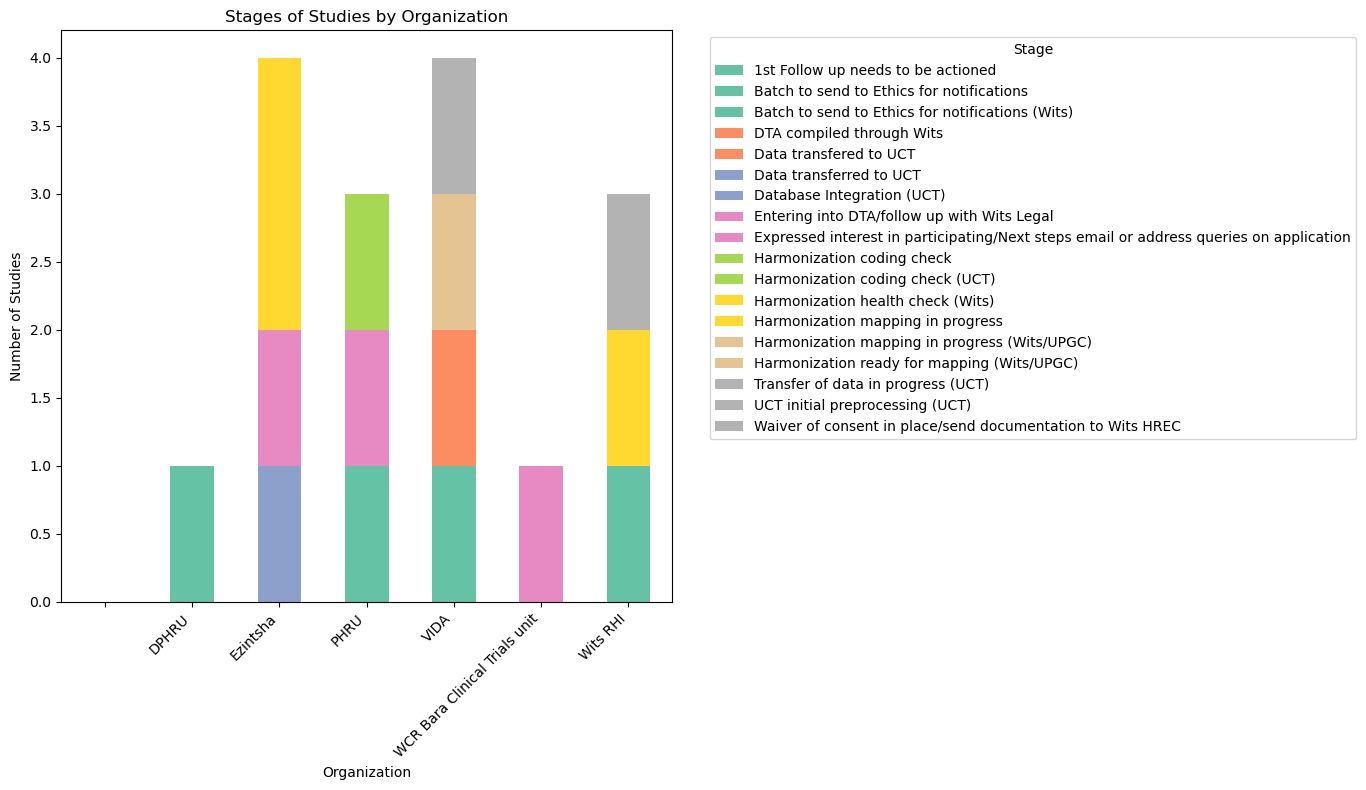

In [14]:
# Pivot the DataFrame for easier plotting with stacked bars
df_pivot = df.pivot(index='Organization', columns='Stage', values='Count').fillna(0)

# Plotting with stacked bars
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
ax.set_title('Stages of Studies by Organization')
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Studies')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


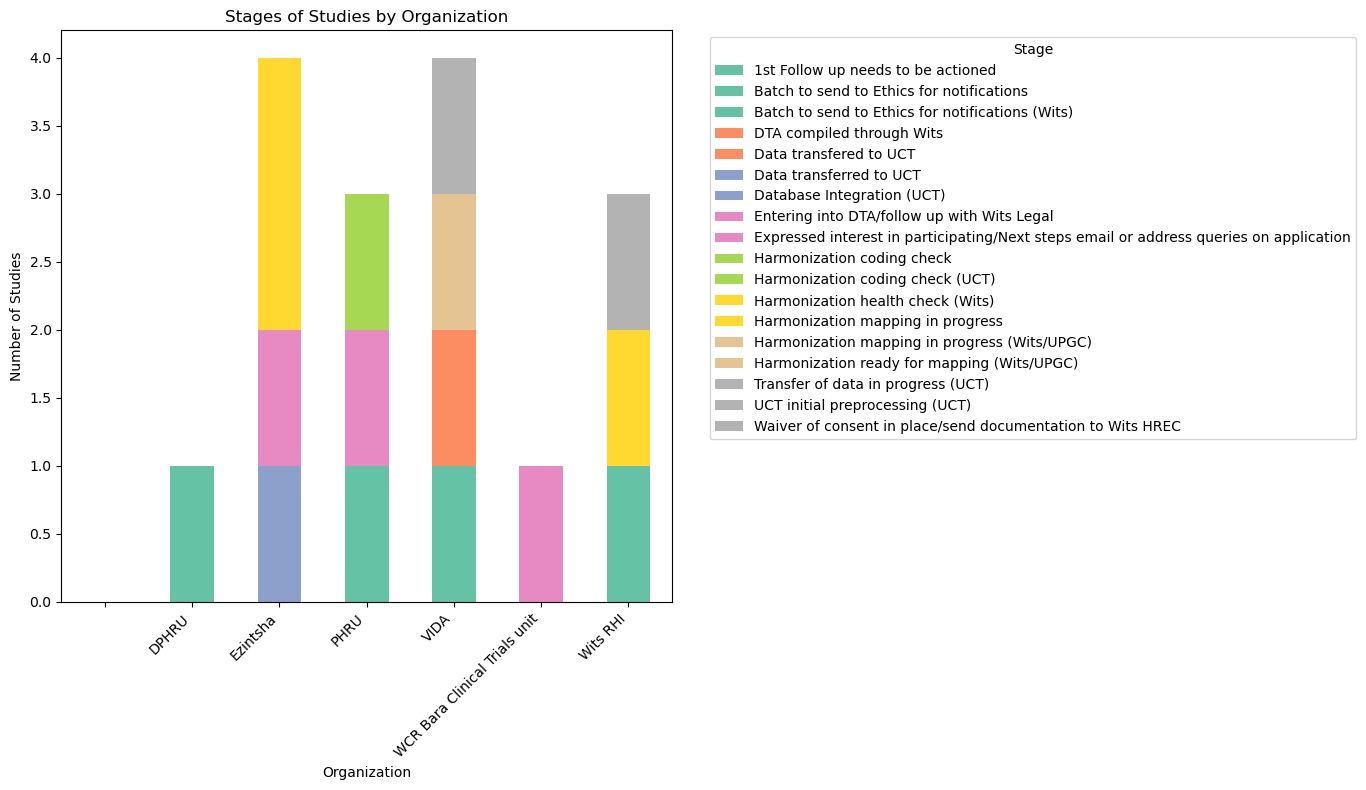

In [15]:
# Pivot the DataFrame for easier plotting with stacked bars
df_pivot = df.pivot(index='Organization', columns='Stage', values='Count').fillna(0)

# Plotting with stacked bars
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
ax.set_title('Stages of Studies by Organization')
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Studies')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

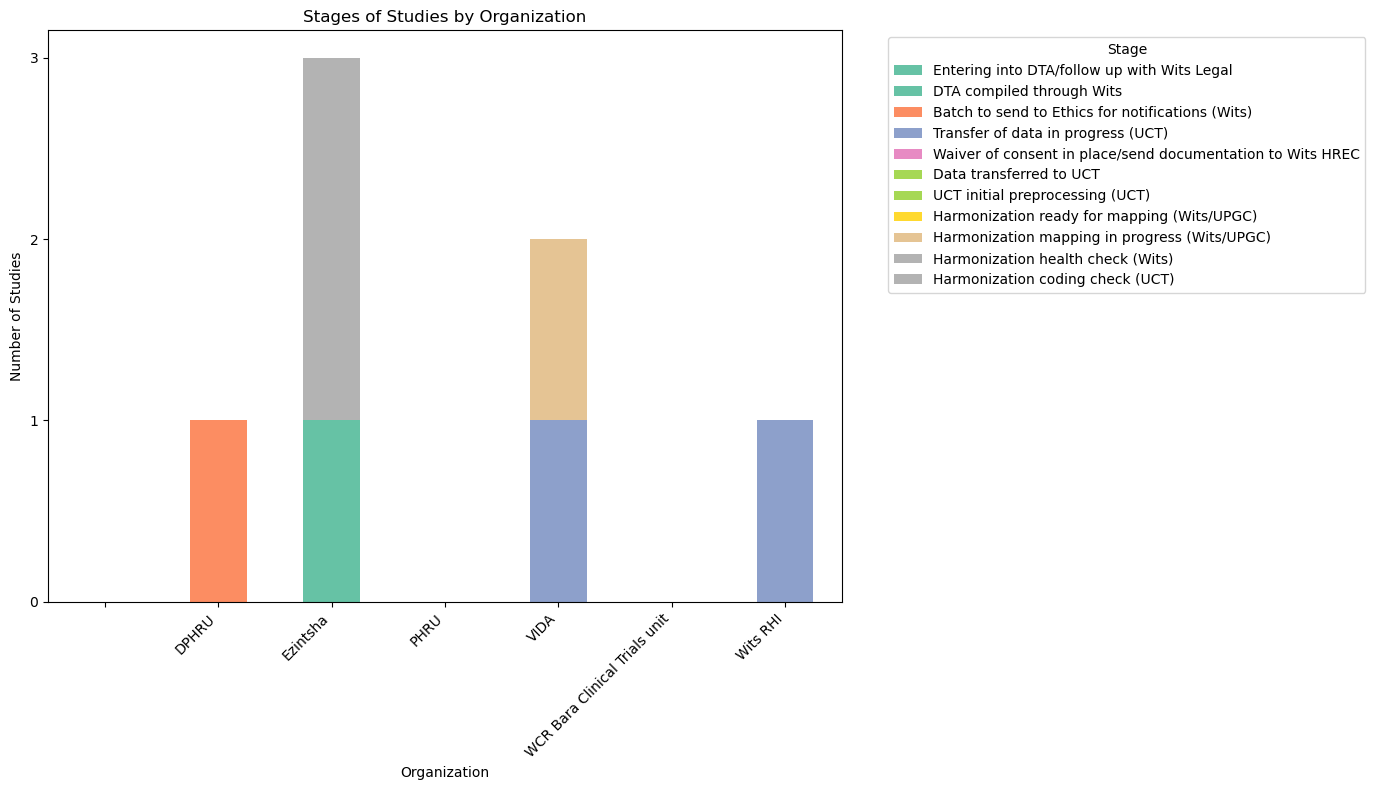

In [17]:
import pandas as pd

# Prepare data for the stacked bar graph
data_list = []
for org, stage_dict in stages_data.items():
    for stage, count in stage_dict.items():
        data_list.append([org, stage, count])

df = pd.DataFrame(data_list, columns=['Organization', 'Stage', 'Count'])

# Reorder stages based on the Trello board order
stage_order = [
    "Entering into DTA/follow up with Wits Legal",
    "DTA compiled through Wits",
    "Batch to send to Ethics for notifications (Wits)",
    "Transfer of data in progress (UCT)",
    "Waiver of consent in place/send documentation to Wits HREC",
    "Data transferred to UCT",
    "UCT initial preprocessing (UCT)",
    "Harmonization ready for mapping (Wits/UPGC)",
    "Harmonization mapping in progress (Wits/UPGC)",
    "Harmonization health check (Wits)",
    "Harmonization coding check (UCT)"
]

# Ensure all stages are in the DataFrame, even if some have no counts
missing_stages = [{'Organization': '', 'Stage': stage, 'Count': 0} for stage in stage_order if stage not in df['Stage'].values]
df = pd.concat([df, pd.DataFrame(missing_stages)], ignore_index=True)

# Pivot the DataFrame for easier plotting with stacked bars
df_pivot = df.pivot(index='Organization', columns='Stage', values='Count').fillna(0)
df_pivot = df_pivot[stage_order]  # Reorder columns

# Plotting with stacked bars and customized y-axis labels to show only whole numbers
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Customize y-axis labels to be whole numbers only
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

ax.set_title('Stages of Studies by Organization')
ax.set_xlabel('Organization')
ax.set_ylabel('Number of Studies')
ax.legend(title='Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()
